In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
df = pd.read_csv('./teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

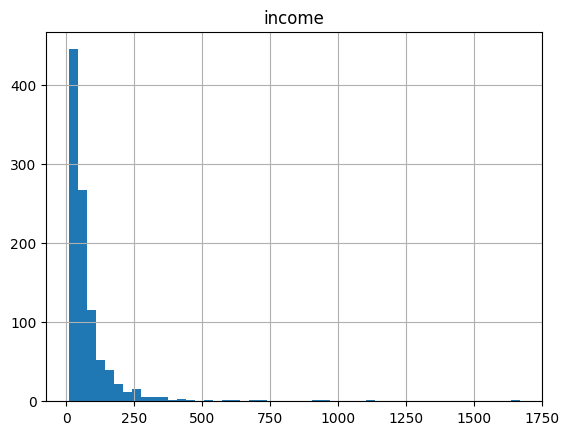

In [4]:
df.hist(column='income', bins=50)

In [5]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [6]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test.shape, y_test.shape

((200, 11), (200,))

In [8]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [9]:
y_pred = neigh.predict(x_test)
y_pred

array([4, 2, 3, 2, 3, 3, 4, 3, 1, 4, 2, 3, 4, 1, 1, 1, 4, 4, 1, 1, 1, 1,
       1, 3, 3, 3, 2, 4, 4, 4, 1, 1, 3, 1, 4, 2, 1, 1, 1, 4, 3, 3, 3, 3,
       1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       4, 1, 2, 1, 3, 3, 3, 1, 2, 1, 3, 3, 3, 1, 1, 1, 2, 2, 3, 3, 1, 4,
       2, 2, 4, 3, 2, 3, 3, 2, 2, 1, 4, 1, 2, 3, 1, 2, 4, 1, 1, 3, 1, 2,
       2, 1, 1, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 3, 3, 1, 2, 1, 4,
       1, 1, 4, 2, 3, 2, 1, 1, 4, 1, 1, 4, 1, 4, 4, 3, 4, 3, 1, 4, 1, 3,
       3, 1, 2, 3, 3, 1, 4, 1, 2, 3, 1, 1, 2, 3, 1, 4, 1, 3, 4, 4, 3, 4,
       4, 1, 1, 1, 2, 3, 4, 2, 1, 4, 2, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 4,
       4, 3])

In [10]:
from sklearn.metrics import accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.325


In [11]:
ks = 10
mean_acc = np.zeros((ks - 1))
std_dev = np.zeros((ks - 1))

for n in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(x_train, y_train)
    y_pred = neigh.predict(x_test)
    mean_acc[n - 1] = accuracy_score(y_test, y_pred)
    std_dev[n - 1] = np.std(y_test == y_pred)/np.sqrt(y_pred.shape[0])
mean_acc

array([0.29 , 0.34 , 0.365, 0.325, 0.33 , 0.33 , 0.33 , 0.335, 0.33 ])

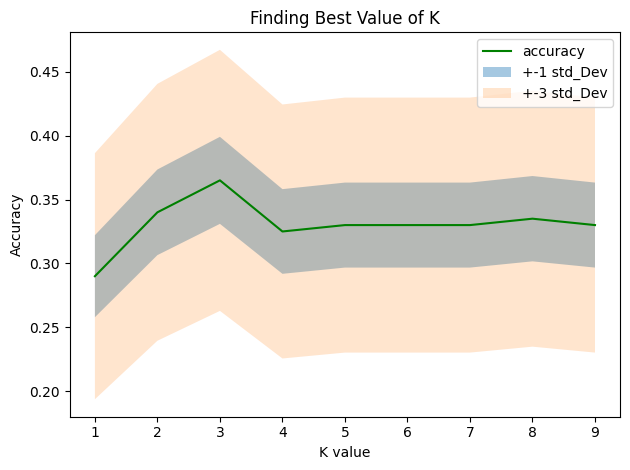

In [12]:
plt.title('Finding Best Value of K')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.plot(range(1, ks), mean_acc, 'green')
plt.fill_between(range(1, ks), mean_acc - 1 * std_dev, mean_acc + 1 * std_dev, alpha=0.4)
plt.fill_between(range(1, ks), mean_acc - 3 * std_dev, mean_acc + 3 * std_dev, alpha=0.2)
plt.legend(('accuracy', '+-1 std_Dev', '+-3 std_Dev'), loc='upper right')
plt.tight_layout()
plt.show()

In [13]:
print(f'The best accuracy is {max(mean_acc)} with k = {mean_acc.argmax() + 1}')

The best accuracy is 0.365 with k = 3
